In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import SVR
import matplotlib.pyplot as plt
import random
import copy

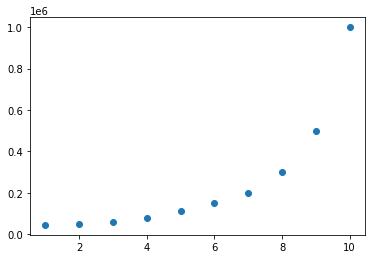

In [2]:
# x = np.vstack(np.arange(1,30,0.5))
# orig_x = copy.deepcopy(x)
# y = 10* np.sin(x)
# y += [ yi + 3 * (0.5 - np.random.rand()) for yi in y]
x = np.vstack(np.arange(1,11,1))
y = np.array([[45000],[50000],[60000],[80000],[110000],[150000],[200000],[300000],[500000],[1000000]], dtype=np.float64)
# y = [np.exp(xi) for xi in x]
plt.scatter(x,y)
plt.show()

In [3]:
svr = SVR("rbf", {"gamma": 10})
svr.fit(x, y, {'eps':1e-2, 'maxiter':3e3}, scaled=True)

i:    0 - v: 0.000000 - fref:  inf - ||g||: 3.162278 - delta: 0.000000e+00 - ||gdiff||:  inf - eps: 1.000000e-02
i:    1 - v: -0.000093 - fref: 0.000000 - ||g||: 2.935786 - delta: 1.000000e-04 - ||gdiff||: 0.226492 - eps: 1.000000e-02
i:    2 - v: -0.007638 - fref: -0.000093 - ||g||: 2.932601 - delta: 1.000000e-02 - ||gdiff||: 0.003185 - eps: 1.000000e-02
i:    3 - v: -0.014779 - fref: -0.007638 - ||g||: 2.929589 - delta: 1.000000e-02 - ||gdiff||: 0.003012 - eps: 1.000000e-02
i:    4 - v: -0.021807 - fref: -0.014779 - ||g||: 2.926624 - delta: 1.000000e-02 - ||gdiff||: 0.002965 - eps: 1.000000e-02
i:    5 - v: -0.028802 - fref: -0.021807 - ||g||: 2.923671 - delta: 1.000000e-02 - ||gdiff||: 0.002954 - eps: 1.000000e-02
i:    6 - v: -0.035786 - fref: -0.028802 - ||g||: 2.920719 - delta: 1.000000e-02 - ||gdiff||: 0.002952 - eps: 1.000000e-02
i:    7 - v: -0.042768 - fref: -0.035786 - ||g||: 2.917766 - delta: 1.000000e-02 - ||gdiff||: 0.002953 - eps: 1.000000e-02
i:    8 - v: -0.049748 - fr

i:  419 - v: -2.642893 - fref: -2.642785 - ||g||: 1.458387 - delta: 2.642785e-02 - ||gdiff||: -0.021294 - eps: 1.000000e-02
i:  420 - v: -2.643034 - fref: -2.642893 - ||g||: 1.436317 - delta: 2.642893e-02 - ||gdiff||: 0.022069 - eps: 1.000000e-02
i:  421 - v: -2.643165 - fref: -2.643034 - ||g||: 1.435938 - delta: 2.643034e-02 - ||gdiff||: 0.000380 - eps: 1.000000e-02
i:  422 - v: -2.643302 - fref: -2.643165 - ||g||: 1.435565 - delta: 2.643165e-02 - ||gdiff||: 0.000373 - eps: 1.000000e-02
i:  423 - v: -2.643440 - fref: -2.643302 - ||g||: 1.435198 - delta: 2.643302e-02 - ||gdiff||: 0.000367 - eps: 1.000000e-02
i:  424 - v: -2.643547 - fref: -2.643440 - ||g||: 1.456530 - delta: 2.643440e-02 - ||gdiff||: -0.021333 - eps: 1.000000e-02
i:  425 - v: -2.643667 - fref: -2.643547 - ||g||: 1.434463 - delta: 2.643547e-02 - ||gdiff||: 0.022067 - eps: 1.000000e-02
i:  426 - v: -2.643787 - fref: -2.643667 - ||g||: 1.434104 - delta: 2.643667e-02 - ||gdiff||: 0.000359 - eps: 1.000000e-02
i:  427 - v: -

i:  839 - v: -2.651110 - fref: -2.651143 - ||g||: 1.397836 - delta: 2.651143e-02 - ||gdiff||: 0.021012 - eps: 1.000000e-02
i:  840 - v: -2.651107 - fref: -2.651143 - ||g||: 1.397839 - delta: 2.651143e-02 - ||gdiff||: -0.000003 - eps: 1.000000e-02
i:  841 - v: -2.651119 - fref: -2.651143 - ||g||: 1.397837 - delta: 2.651143e-02 - ||gdiff||: 0.000002 - eps: 1.000000e-02
i:  842 - v: -2.651136 - fref: -2.651143 - ||g||: 1.397834 - delta: 2.651143e-02 - ||gdiff||: 0.000003 - eps: 1.000000e-02
i:  843 - v: -2.651089 - fref: -2.651143 - ||g||: 1.418929 - delta: 2.651143e-02 - ||gdiff||: -0.021095 - eps: 1.000000e-02
i:  844 - v: -2.651118 - fref: -2.651143 - ||g||: 1.397809 - delta: 2.651143e-02 - ||gdiff||: 0.021119 - eps: 1.000000e-02
i:  845 - v: -2.651120 - fref: -2.651143 - ||g||: 1.397801 - delta: 2.651143e-02 - ||gdiff||: 0.000009 - eps: 1.000000e-02
i:  846 - v: -2.651134 - fref: -2.651143 - ||g||: 1.397795 - delta: 2.651143e-02 - ||gdiff||: 0.000005 - eps: 1.000000e-02
i:  847 - v: -

i: 1308 - v: -2.651132 - fref: -2.651160 - ||g||: 1.418171 - delta: 2.651160e-02 - ||gdiff||: -0.021070 - eps: 1.000000e-02
i: 1309 - v: -2.651127 - fref: -2.651160 - ||g||: 1.397089 - delta: 2.651160e-02 - ||gdiff||: 0.021082 - eps: 1.000000e-02
i: 1310 - v: -2.651129 - fref: -2.651160 - ||g||: 1.397087 - delta: 2.651160e-02 - ||gdiff||: 0.000002 - eps: 1.000000e-02
i: 1311 - v: -2.651142 - fref: -2.651160 - ||g||: 1.397088 - delta: 2.651160e-02 - ||gdiff||: -0.000001 - eps: 1.000000e-02
i: 1312 - v: -2.651153 - fref: -2.651160 - ||g||: 1.418131 - delta: 2.651160e-02 - ||gdiff||: -0.021043 - eps: 1.000000e-02
i: 1313 - v: -2.651124 - fref: -2.651160 - ||g||: 1.397076 - delta: 2.651160e-02 - ||gdiff||: 0.021055 - eps: 1.000000e-02
i: 1314 - v: -2.651126 - fref: -2.651160 - ||g||: 1.397073 - delta: 2.651160e-02 - ||gdiff||: 0.000003 - eps: 1.000000e-02
i: 1315 - v: -2.651139 - fref: -2.651160 - ||g||: 1.397074 - delta: 2.651160e-02 - ||gdiff||: -0.000001 - eps: 1.000000e-02
i: 1316 - v:

i: 1780 - v: -2.651137 - fref: -2.651160 - ||g||: 1.397084 - delta: 2.651160e-02 - ||gdiff||: 0.021110 - eps: 1.000000e-02
i: 1781 - v: -2.651139 - fref: -2.651160 - ||g||: 1.397081 - delta: 2.651160e-02 - ||gdiff||: 0.000002 - eps: 1.000000e-02
i: 1782 - v: -2.651153 - fref: -2.651160 - ||g||: 1.397082 - delta: 2.651160e-02 - ||gdiff||: -0.000001 - eps: 1.000000e-02
i: 1783 - v: -2.651121 - fref: -2.651160 - ||g||: 1.418154 - delta: 2.651160e-02 - ||gdiff||: -0.021072 - eps: 1.000000e-02
i: 1784 - v: -2.651134 - fref: -2.651160 - ||g||: 1.397070 - delta: 2.651160e-02 - ||gdiff||: 0.021084 - eps: 1.000000e-02
i: 1785 - v: -2.651136 - fref: -2.651160 - ||g||: 1.397067 - delta: 2.651160e-02 - ||gdiff||: 0.000003 - eps: 1.000000e-02
i: 1786 - v: -2.651149 - fref: -2.651160 - ||g||: 1.397068 - delta: 2.651160e-02 - ||gdiff||: -0.000001 - eps: 1.000000e-02
i: 1787 - v: -2.651136 - fref: -2.651160 - ||g||: 1.417984 - delta: 2.651160e-02 - ||gdiff||: -0.020916 - eps: 1.000000e-02
i: 1788 - v:

i: 2207 - v: -2.651138 - fref: -2.651160 - ||g||: 1.397077 - delta: 2.651160e-02 - ||gdiff||: 0.000002 - eps: 1.000000e-02
i: 2208 - v: -2.651152 - fref: -2.651160 - ||g||: 1.397078 - delta: 2.651160e-02 - ||gdiff||: -0.000001 - eps: 1.000000e-02
i: 2209 - v: -2.651127 - fref: -2.651160 - ||g||: 1.418144 - delta: 2.651160e-02 - ||gdiff||: -0.021066 - eps: 1.000000e-02
i: 2210 - v: -2.651132 - fref: -2.651160 - ||g||: 1.397066 - delta: 2.651160e-02 - ||gdiff||: 0.021078 - eps: 1.000000e-02
i: 2211 - v: -2.651134 - fref: -2.651160 - ||g||: 1.397064 - delta: 2.651160e-02 - ||gdiff||: 0.000003 - eps: 1.000000e-02
i: 2212 - v: -2.651148 - fref: -2.651160 - ||g||: 1.397065 - delta: 2.651160e-02 - ||gdiff||: -0.000001 - eps: 1.000000e-02
i: 2213 - v: -2.651136 - fref: -2.651160 - ||g||: 1.417980 - delta: 2.651160e-02 - ||gdiff||: -0.020916 - eps: 1.000000e-02
i: 2214 - v: -2.651112 - fref: -2.651160 - ||g||: 1.397093 - delta: 2.651160e-02 - ||gdiff||: 0.020887 - eps: 1.000000e-02
i: 2215 - v:

i: 2656 - v: -2.651148 - fref: -2.651160 - ||g||: 1.397075 - delta: 2.651160e-02 - ||gdiff||: -0.000001 - eps: 1.000000e-02
i: 2657 - v: -2.651141 - fref: -2.651160 - ||g||: 1.418128 - delta: 2.651160e-02 - ||gdiff||: -0.021053 - eps: 1.000000e-02
i: 2658 - v: -2.651129 - fref: -2.651160 - ||g||: 1.397063 - delta: 2.651160e-02 - ||gdiff||: 0.021065 - eps: 1.000000e-02
i: 2659 - v: -2.651131 - fref: -2.651160 - ||g||: 1.397061 - delta: 2.651160e-02 - ||gdiff||: 0.000003 - eps: 1.000000e-02
i: 2660 - v: -2.651144 - fref: -2.651160 - ||g||: 1.397061 - delta: 2.651160e-02 - ||gdiff||: -0.000001 - eps: 1.000000e-02
i: 2661 - v: -2.651142 - fref: -2.651160 - ||g||: 1.396945 - delta: 2.651160e-02 - ||gdiff||: 0.000116 - eps: 1.000000e-02
i: 2662 - v: -2.651117 - fref: -2.651160 - ||g||: 1.418201 - delta: 2.651160e-02 - ||gdiff||: -0.021256 - eps: 1.000000e-02
i: 2663 - v: -2.651121 - fref: -2.651160 - ||g||: 1.397105 - delta: 2.651160e-02 - ||gdiff||: 0.021096 - eps: 1.000000e-02
i: 2664 - v:

b: [-0.08267524]
Gamma: 10 - Box: 1.0
PREDICTION (INPUT = 12) [[228249.03427441]]
LOSS: [2.02070319e+11]


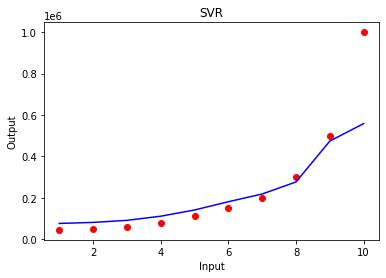

In [4]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

 b: [-0.09264195]
Gamma: 10 - Box: 1.0
PREDICTION (INPUT = 12) [223188.66591619]


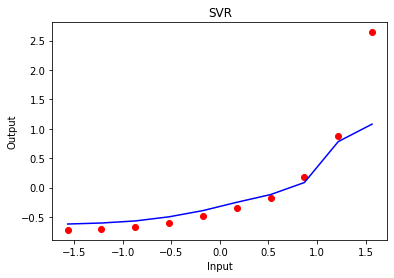

In [12]:
import sklearn.svm as ss
regressor = ss.SVR(kernel = 'rbf', gamma=10)

sc_X = StandardScaler()
sc_y = StandardScaler()
xs = sc_X.fit_transform(x)
ys = sc_y.fit_transform(y)

regressor.fit(xs, ys.ravel())
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', sc_y.inverse_transform(y_pred))

plt.scatter(xs, ys, color = 'red')
plt.plot(xs, regressor.predict(xs), color = 'blue')
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [6]:
regressor.support_vectors_

array([[-1.5666989 ],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
regressor.support_

array([0, 6, 7, 8, 9])

In [8]:
regressor.epsilon

0.1

In [9]:
regressor.intercept_

array([0.02033234])

In [10]:
params = regressor.get_params()
params['gamma']

0.56

In [11]:
params['C']

1.0